In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline


# Load dataset
df = pd.read_csv('Dataset.csv')

<ipython-input-1-d928108690cd>:21: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset.csv')


In [2]:
df.shape

(121856, 40)

In [3]:
df.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [4]:
df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [5]:
df['Default'].value_counts()

Default
0    112011
1      9845
Name: count, dtype: int64

C:\Users\u393845\venv_xai\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Default', ylabel='count'>

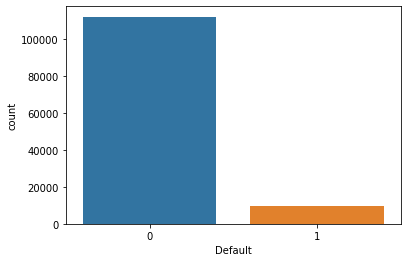

In [6]:
sns.countplot(df['Default'])

In [16]:
df = df.drop(columns=['ID'])

In [17]:
df

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,Service,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,Commercial,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,Govt Job,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,Service,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


# removing $, x, etc symbol and changing datatype to numeric (float) for the required columns

In [18]:
df['Client_Income'] = pd.to_numeric(df['Client_Income'], errors='coerce')
df['Credit_Amount'] = pd.to_numeric(df['Age_Days'], errors='coerce')
df['Loan_Annuity'] = pd.to_numeric(df['Age_Days'], errors='coerce')
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')
df['Employed_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')
df['Registration_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')
df['ID_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')
df['Score_Source_3'] = pd.to_numeric(df['Age_Days'], errors='coerce')
df['Population_Region_Relative'] = pd.to_numeric(df['Population_Region_Relative'], errors='coerce')


In [19]:
df.dtypes

Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_

In [20]:
# Replace '##' with NaN because it has no siginficance
df['Accompany_Client'] = df['Accompany_Client'].replace('##', np.nan)

# Advanced Feature Engineering

In [21]:

# df['Age_Years'] = df['Age_Days'] / 365
# df['Employed_Years'] = df['Employed_Days'] / 365
# df['Employment_Ratio'] = df['Employed_Days'] / df['Age_Days']
# df['Debt_Income_Ratio'] = df['Credit_Amount'] / df['Client_Income']
# df['Loan_Income_Ratio'] = df['Loan_Annuity'] / df['Client_Income']
# df['Own_House_Flag'] = (df['House_Own'] > 0).astype(int)
# df['Has_Children'] = (df['Child_Count'] > 0).astype(int)
# df['Dependents'] = df['Client_Family_Members'] - 1
# df['House_Own_Age_Years'] = df['Own_House_Age'] / 365

In [22]:
target = 'Default'  # replace 'target' with your target column name
X = df.drop(columns=[target])
y = df[target]


In [23]:
# Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [24]:
numeric_features

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Own_House_Age', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members',
       'Cleint_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau'],
      dtype='object')

In [25]:
categorical_features

Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Client_Occupation',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization'],
      dtype='object')

# #fill missing values in categorical columns with most frequent


In [26]:
# Initialize the imputer with the strategy to use the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer and transform the DataFrame for each categorical column
for col in categorical_features:
    df[col] = imputer.fit_transform(df[[col]]).ravel()


# #fill missing values in numeric columns with median

In [27]:
# Initialize the imputer with the strategy to use the median value
imputer = SimpleImputer(strategy='median')

# Fit the imputer and transform the DataFrame for the numerical columns
df[numeric_features] = imputer.fit_transform(df[numeric_features])

In [28]:
df.isna().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Org

# To Diagnose and Fix Multicollinearity

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF before:
                       feature         VIF
0                Client_Income    3.455869
1                    Car_Owned    1.672449
2                   Bike_Owned    1.475986
3                  Active_Loan    1.939545
4                    House_Own    3.469752
5                  Child_Count    4.923745
6                Credit_Amount         inf
7                 Loan_Annuity         inf
8   Population_Region_Relative    1.003530
9                     Age_Days         inf
10               Employed_Days         inf
11           Registration_Days         inf
12                     ID_Days         inf
13               Own_House_Age    3.121887
14                  Mobile_Tag  100.982826
15               Homephone_Tag    1.442650
16           Workphone_Working    1.556100
17       Client_Family_Members   24.531475
18          Cleint_City_Rating   19.965986
19     Application_Process_Day    4.289881
20    Application_Process_Hour   16.419515
21              Score_Source_1   16.361678

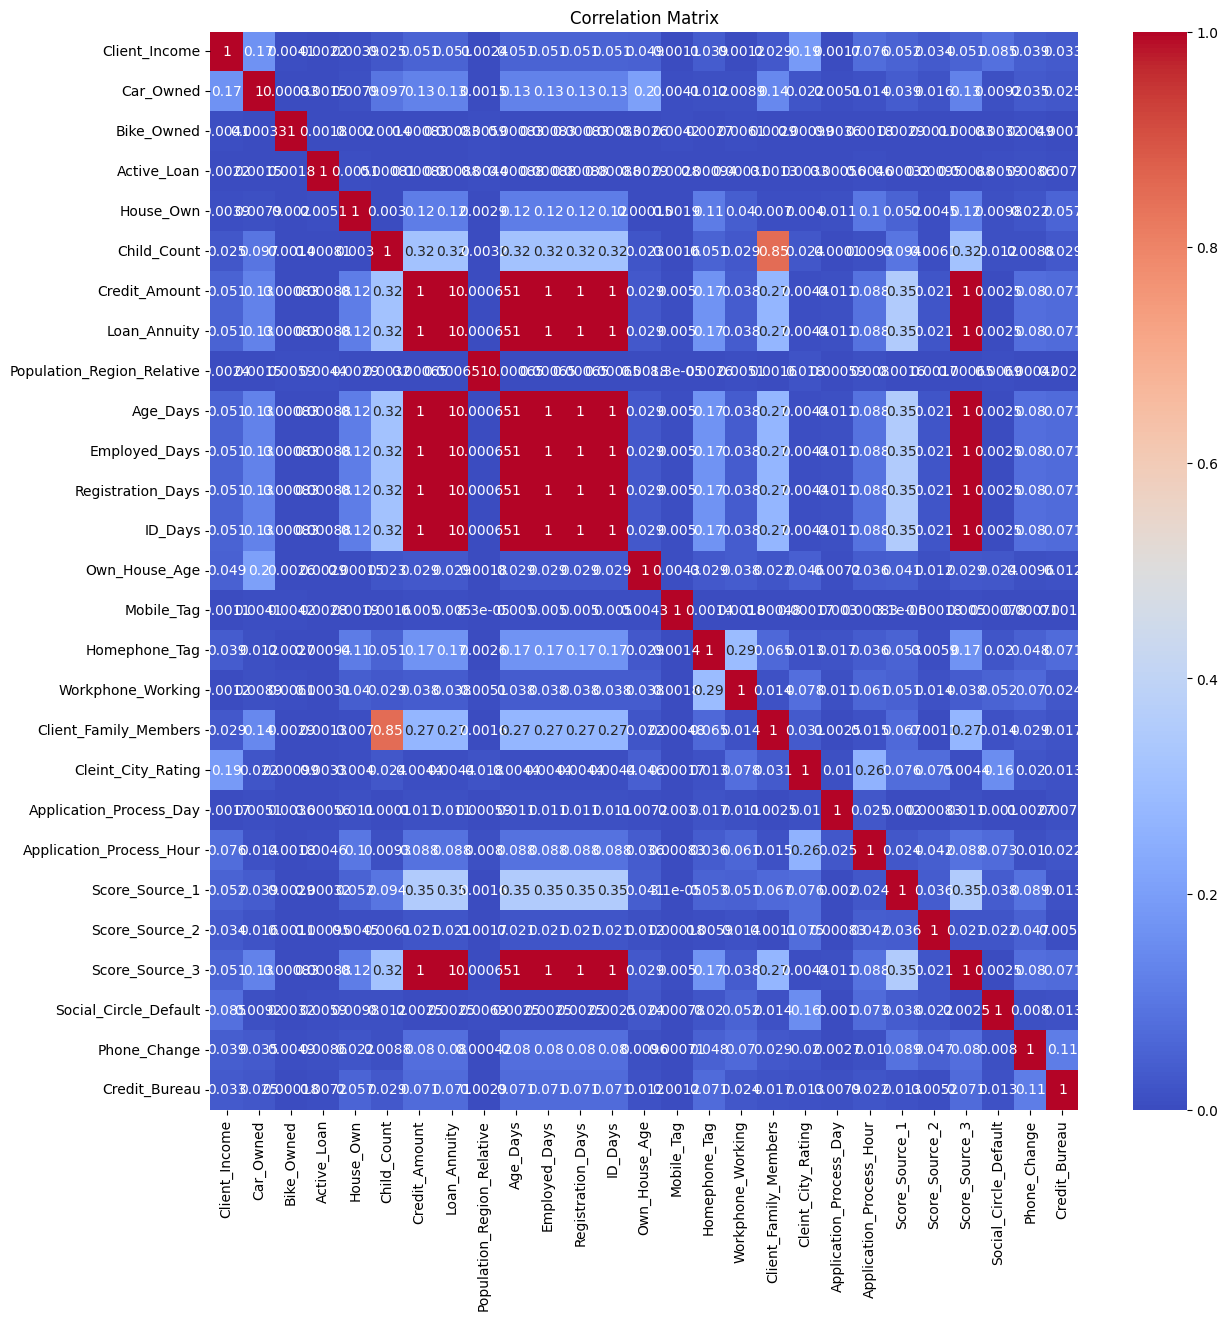

In [29]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt


# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Calculate VIF before removing multicollinear features
vif_before = calculate_vif(df[numeric_features])
print("VIF before:")
print(vif_before)

# Correlation matrix
corr_matrix = df[numeric_features].corr().abs()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Plot heatmap for visualization
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix')
plt.show()



In [30]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("\nFeatures to drop:")
print(to_drop)


numeric_features = list(set(numeric_features)-set(to_drop))

print(numeric_features)


Features to drop:
['Loan_Annuity', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Score_Source_3']
['Bike_Owned', 'Score_Source_1', 'Workphone_Working', 'Mobile_Tag', 'Client_Income', 'Credit_Bureau', 'Score_Source_2', 'Credit_Amount', 'Homephone_Tag', 'Application_Process_Hour', 'Car_Owned', 'Active_Loan', 'Cleint_City_Rating', 'Client_Family_Members', 'Application_Process_Day', 'Population_Region_Relative', 'Own_House_Age', 'House_Own', 'Child_Count', 'Social_Circle_Default', 'Phone_Change']


In [31]:
df.columns

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Own_House_Age', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [32]:
df[numeric_features].columns

Index(['Bike_Owned', 'Score_Source_1', 'Workphone_Working', 'Mobile_Tag',
       'Client_Income', 'Credit_Bureau', 'Score_Source_2', 'Credit_Amount',
       'Homephone_Tag', 'Application_Process_Hour', 'Car_Owned', 'Active_Loan',
       'Cleint_City_Rating', 'Client_Family_Members',
       'Application_Process_Day', 'Population_Region_Relative',
       'Own_House_Age', 'House_Own', 'Child_Count', 'Social_Circle_Default',
       'Phone_Change'],
      dtype='object')

In [33]:
# Drop highly correlated features
#df = df.drop(columns=to_drop)

# Calculate VIF after removing multicollinear features
vif_after = calculate_vif(df[numeric_features])
print("\nVIF after:")
print(vif_after)


VIF after:
                       feature         VIF
0                   Bike_Owned    1.475986
1               Score_Source_1   16.361678
2            Workphone_Working    1.556100
3                   Mobile_Tag  100.982826
4                Client_Income    3.455869
5                Credit_Bureau    2.069381
6               Score_Source_2    1.534190
7                Credit_Amount   20.015050
8                Homephone_Tag    1.442650
9     Application_Process_Hour   16.419515
10                   Car_Owned    1.672449
11                 Active_Loan    1.939545
12          Cleint_City_Rating   19.965986
13       Client_Family_Members   24.531475
14     Application_Process_Day    4.289881
15  Population_Region_Relative    1.003530
16               Own_House_Age    3.121887
17                   House_Own    3.469752
18                 Child_Count    4.923745
19       Social_Circle_Default    2.872753
20                Phone_Change    2.465534


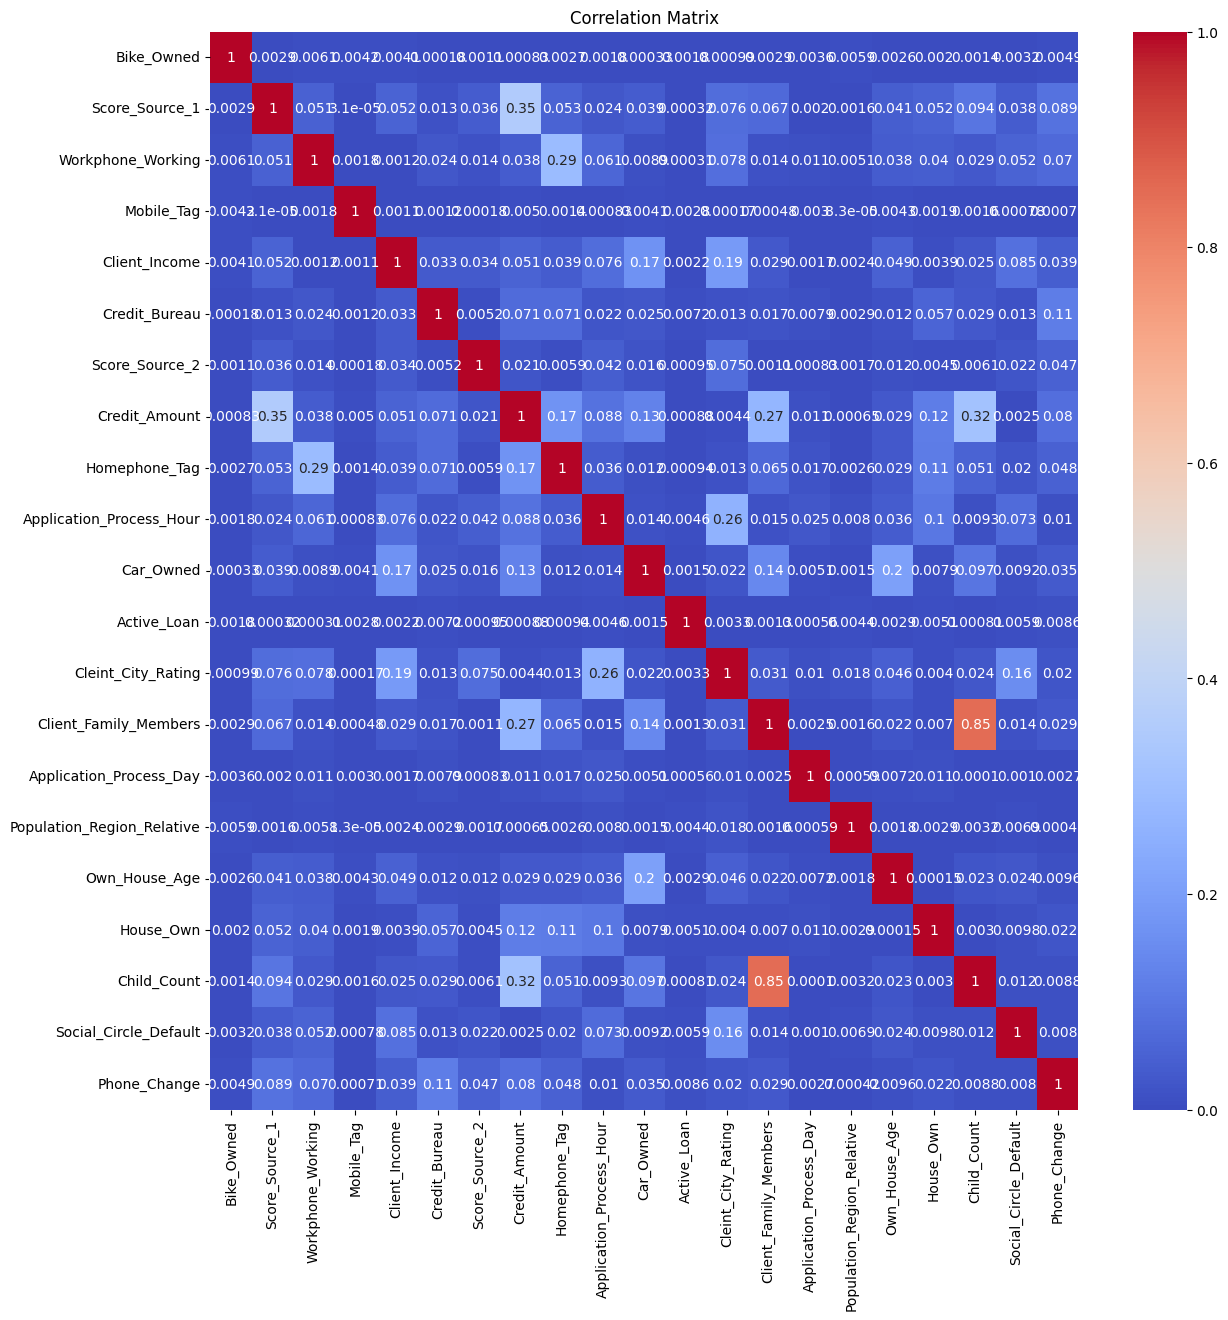

In [34]:
corr_matrix = df[numeric_features].corr().abs()

# Plot heatmap for visualization
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# one hot encoding

In [35]:


# Separate features and target variable
target = 'Default'  # replace 'target' with your target column name
X = df.drop(columns=[target])
y = df[target]


# Scale numerical features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cats = encoder.fit_transform(X[categorical_features])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

# Combine preprocessed numeric and categorical features
X_preprocessed = pd.concat([pd.DataFrame(X[numeric_features], columns=numeric_features).reset_index(drop=True), encoded_cat_df.reset_index(drop=True)], axis=1)

# Check the shape of the preprocessed data
print(f"Shape of preprocessed data: {X_preprocessed.shape}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Shape of preprocessed data: (121856, 124)


# try ordinal encoding

In [36]:


# # Separate features and target variable
# target = 'Default'  # replace 'target' with your target column name
# X = df.drop(columns=[target])
# y = df[target]

# X_categorical_features = X.select_dtypes(include='object')

# from sklearn.preprocessing import OrdinalEncoder
# oe=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# X_categorical_features=oe.fit_transform(X_categorical_features)
# X_categorical_features = pd.DataFrame(X_categorical_features, columns=categorical_features)



# # # Scale numerical features
# scaler = StandardScaler()
# X_numeric_features = scaler.fit_transform(X[numeric_features])
# X_numeric_features = pd.DataFrame(X_numeric_features, columns=numeric_features)

# # Combine preprocessed numeric and categorical features
# X_preprocessed = pd.concat([pd.DataFrame(X_numeric_features, columns=numeric_features).reset_index(drop=True), X_categorical_features.reset_index(drop=True)], axis=1)

# # Check the shape of the preprocessed data
# print(f"Shape of preprocessed data: {X_preprocessed.shape}")


In [37]:
X_preprocessed.dtypes

Bike_Owned                             float64
Score_Source_1                         float64
Workphone_Working                      float64
Mobile_Tag                             float64
Client_Income                          float64
                                        ...   
Type_Organization_Transport: type 2    float64
Type_Organization_Transport: type 3    float64
Type_Organization_Transport: type 4    float64
Type_Organization_University           float64
Type_Organization_XNA                  float64
Length: 124, dtype: object

# Function to identify columns with mixed data types

In [38]:

def identify_mixed_type_columns(df):
    mixed_type_columns = {}

    for column in df.columns:
        unique_types = df[column].apply(lambda x: type(x)).unique()

        if len(unique_types) > 1:
            mixed_type_columns[column] = unique_types

    return mixed_type_columns

# Identify columns with mixed data types
mixed_columns = identify_mixed_type_columns(df)

# Display columns with mixed data types and their unique types
print("Columns with mixed data types and their unique types:")
for column, types in mixed_columns.items():
    print(f"{column}: {types}")


Columns with mixed data types and their unique types:


In [39]:
df.Accompany_Client.unique()

array(['Alone', 'Relative', 'Others', 'Kids', 'Partner', 'Group'],
      dtype=object)

# Model training : Random Forest

Accuracy: 0.9309043164286886
Confusion Matrix:
 [[22425     0]
 [ 1684   263]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     22425
           1       1.00      0.14      0.24      1947

    accuracy                           0.93     24372
   macro avg       0.97      0.57      0.60     24372
weighted avg       0.94      0.93      0.91     24372

Precision: 1.00
Recall: 0.14
F1 Score: 0.24
AUC-ROC: 0.76


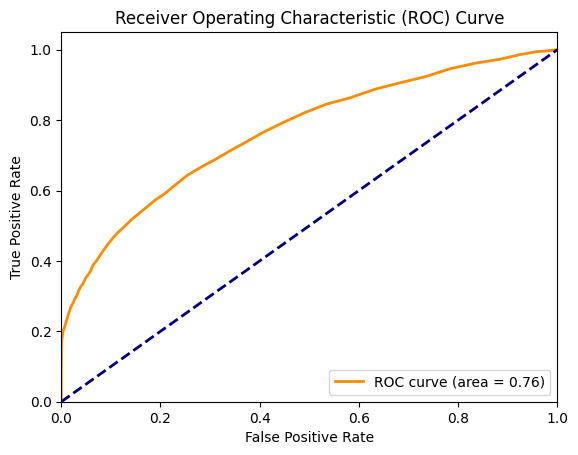

In [40]:
# Model training and evaluation

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




# Make predictions
#y_pred = model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

# Plot AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Important features

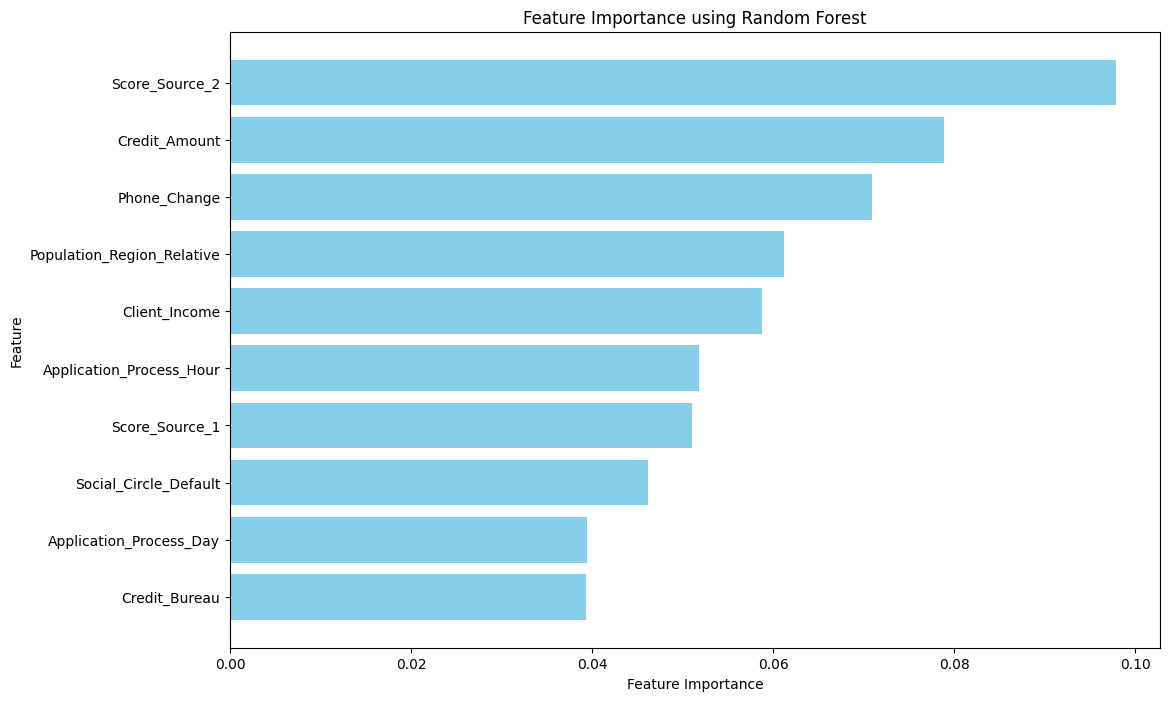

In [41]:
# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_preprocessed.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances = feature_importances[:10]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


# Logistic Regression

In [42]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression(solver='liblinear')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')


Accuracy: 0.9201132447070408
Confusion Matrix:
 [[22425     0]
 [ 1947     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     22425
           1       0.00      0.00      0.00      1947

    accuracy                           0.92     24372
   macro avg       0.46      0.50      0.48     24372
weighted avg       0.85      0.92      0.88     24372

Precision: 0.00
Recall: 0.00
F1 Score: 0.00
AUC-ROC: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Model training
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')



Accuracy: 0.9184720170687675
Confusion Matrix:
 [[22338    87]
 [ 1900    47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     22425
           1       0.35      0.02      0.05      1947

    accuracy                           0.92     24372
   macro avg       0.64      0.51      0.50     24372
weighted avg       0.88      0.92      0.88     24372

Precision: 0.35
Recall: 0.02
F1 Score: 0.05
AUC-ROC: 0.67


# XGBoost

In [44]:
from xgboost import XGBClassifier

# Model training
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')



Accuracy: 0.9197439684884293
Confusion Matrix:
 [[22408    17]
 [ 1939     8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     22425
           1       0.32      0.00      0.01      1947

    accuracy                           0.92     24372
   macro avg       0.62      0.50      0.48     24372
weighted avg       0.87      0.92      0.88     24372

Precision: 0.32
Recall: 0.00
F1 Score: 0.01
AUC-ROC: 0.71


# Handle class imbalance

# 1. Resampling Techniques
# a. Undersampling the majority class:

In [45]:
from imblearn.under_sampling import RandomUnderSampler


# Initialize the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = undersampler.fit_resample(X_preprocessed, y)


In [46]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model training and evaluation

from sklearn.model_selection import GridSearchCV

# Model training
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')




Accuracy: 0.6599796851193499
Confusion Matrix:
 [[1310  640]
 [ 699 1289]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66      1950
           1       0.67      0.65      0.66      1988

    accuracy                           0.66      3938
   macro avg       0.66      0.66      0.66      3938
weighted avg       0.66      0.66      0.66      3938

Precision: 0.67
Recall: 0.65
F1 Score: 0.66
AUC-ROC: 0.73


# b. Oversampling the minority class:

In [47]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the oversampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X_preprocessed, y)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model training and evaluation
from sklearn.model_selection import GridSearchCV

# Model training
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')





Accuracy: 0.9996652159357214
Confusion Matrix:
 [[22264    15]
 [    0 22526]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22279
           1       1.00      1.00      1.00     22526

    accuracy                           1.00     44805
   macro avg       1.00      1.00      1.00     44805
weighted avg       1.00      1.00      1.00     44805

Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC-ROC: 1.00


# c. SMOTE (Synthetic Minority Over-sampling Technique):

In [48]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model training and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Model training
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')





Accuracy: 0.9661644905702489
Confusion Matrix:
 [[22266    13]
 [ 1503 21023]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     22279
           1       1.00      0.93      0.97     22526

    accuracy                           0.97     44805
   macro avg       0.97      0.97      0.97     44805
weighted avg       0.97      0.97      0.97     44805

Precision: 1.00
Recall: 0.93
F1 Score: 0.97
AUC-ROC: 0.99


# 2. Class Weight Adjustment

In [49]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


# Initialize the classifier with class weights
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')



Accuracy: 0.9302478253733792
Confusion Matrix:
 [[22425     0]
 [ 1700   247]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     22425
           1       1.00      0.13      0.23      1947

    accuracy                           0.93     24372
   macro avg       0.96      0.56      0.59     24372
weighted avg       0.94      0.93      0.90     24372

Precision: 1.00
Recall: 0.13
F1 Score: 0.23
AUC-ROC: 0.99


AUC-ROC: 0.75780580019342


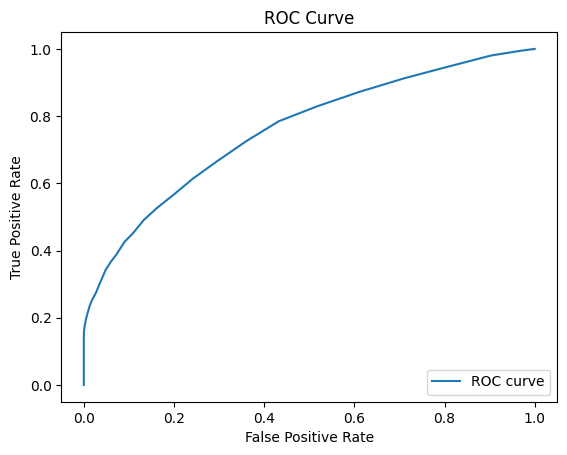

In [50]:
# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
auc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Ensemble Methods

In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize individual models
model1 = LogisticRegression(class_weight='balanced', random_state=42)
model2 = RandomForestClassifier(class_weight='balanced', random_state=42)
model3 = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Combine models into a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', model1),
    ('rf', model2),
    ('dt', model3)
], voting='hard')

# Train the model
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9013211882488101
Confusion Matrix:
 [[21533   892]
 [ 1513   434]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     22425
           1       0.33      0.22      0.27      1947

    accuracy                           0.90     24372
   macro avg       0.63      0.59      0.61     24372
weighted avg       0.89      0.90      0.89     24372

Precision: 0.33
Recall: 0.22
F1 Score: 0.27
AUC-ROC: 0.99


In [52]:
#4. Anomaly Detection

In [53]:
from sklearn.ensemble import IsolationForest

# Initialize the isolation forest
iso_forest = IsolationForest(contamination=float(1)/len(y), random_state=42)

# Train the model
iso_forest.fit(X_preprocessed)

# Predict anomalies (default cases)
y_pred = iso_forest.predict(X_preprocessed)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [54]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [55]:
# Initialize the isolation forest
iso_forest = IsolationForest(contamination=0.5, random_state=42)

# Train the model
iso_forest.fit(X_preprocessed)

# Predict anomalies (default cases)
y_pred = iso_forest.predict(X_preprocessed)

# # Convert predictions to 0 (normal) and 1 (anomaly)
# y_pred = (y_pred == -1).astype(int)

# # Print counts of normal and anomaly cases
# print(pd.Series(y_pred).value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [56]:
y_pred

array([ 1,  1, -1, ..., -1, -1, -1])

In [57]:
y_pred

array([ 1,  1, -1, ..., -1, -1, -1])